### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, rfftfreq
from scipy.fftpack import irfft

# Voice Changer
<b>Help/Idea from Thuntita/Philippe kub</b>
<br>
<b>Steps:</b>
<br>
> 1st - Create a time domain from audio file
<br>
> 2nd - Perform Fast Fourier Transform on audio to change to freqeuncy domain
<br>
> 3rd - Use np.roll to increase the pitch.
<br>
> 4th - The highest frequencies roll over to the lowest ones. That's not what we want, so zero them. 
<br>
> 5th - Revert frequency domain back to time domain
<br>
> 6th - Write new wav file 
<br>

sample sound from: https://www.signalogic.com/melp/HAVEnoise/orig/h_orig.wav
<br>
https://www.signalogic.com/melp/EngSamples/Orig/ENG_M.wav

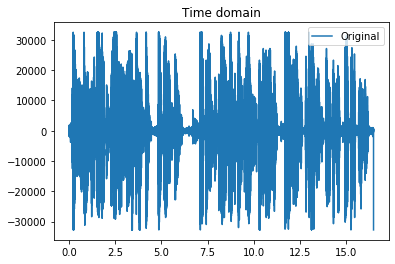

In [98]:
# sample sound from: https://www.signalogic.com/melp/HAVEnoise/orig/h_orig.wav
# https://www.signalogic.com/melp/EngSamples/Orig/ENG_M.wav

# Removing audio noise
from scipy.io import wavfile
freq, y = wavfile.read('images/sample2.wav')
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t,y,label='Original')
plt.title('Time domain')
plt.legend()

No handles with labels found to put in legend.


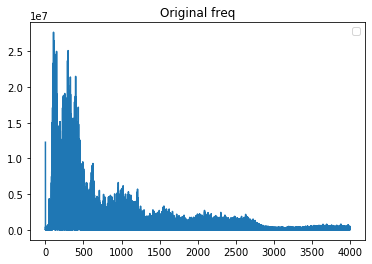

In [99]:
n = len(t)
yf = rfft(y)
xf = rfftfreq(n,dt)
plt.plot(xf,np.abs(yf))
plt.title('Original freq')
plt.legend()

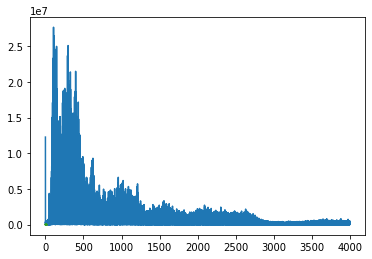

In [128]:
# Robot voice
# np roll frequency array by 2000hz

n = len(t)
yf = rfft(y)
xf = rfftfreq(n,dt)
plt.plot(xf,np.abs(yf))

# use np.roll on frequency array to increase the pitch.
yf = np.roll(yf, 2000)
# The highest frequencies roll over to the lowest ones. That's not what we want, so zero them.
yf[0:2000] = 0

# revert frequency domain back to time domain
voice1 = irfft(yf)
plt.plot(t,y)
plt.plot(t, voice1)

#write new wav file
wavfile.write('images/sample2_voice1.wav', freq, np.array(voice1, dtype=np.int16))

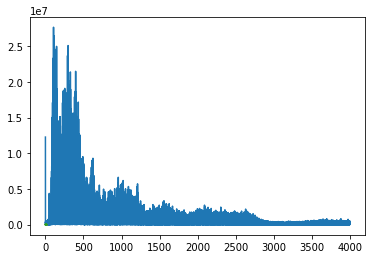

In [131]:
# High pitch voice
n = len(t)
yf = rfft(y)
xf = rfftfreq(n,dt)
plt.plot(xf,np.abs(yf))

# use np.roll on frequency array to increase the pitch.
yf = np.roll(yf, 12500)
yf[0:12500] = 0
# revert frequency domain back to time domain
voice2 = irfft(yf)
plt.plot(t,y)
plt.plot(t, voice2)

#write new wav file
wavfile.write('images/sample2_voice2.wav', freq, np.array(voice2, dtype=np.int16))